## First, import libraries and load the data.

In [3]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [231]:
#data
file = 'train.csv'
data = pd.read_csv(file)

## Looking at the data

In [17]:
#just looking
#For unknown reason 'shape' doesn't work without 'print'.
print(data.shape)
data.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


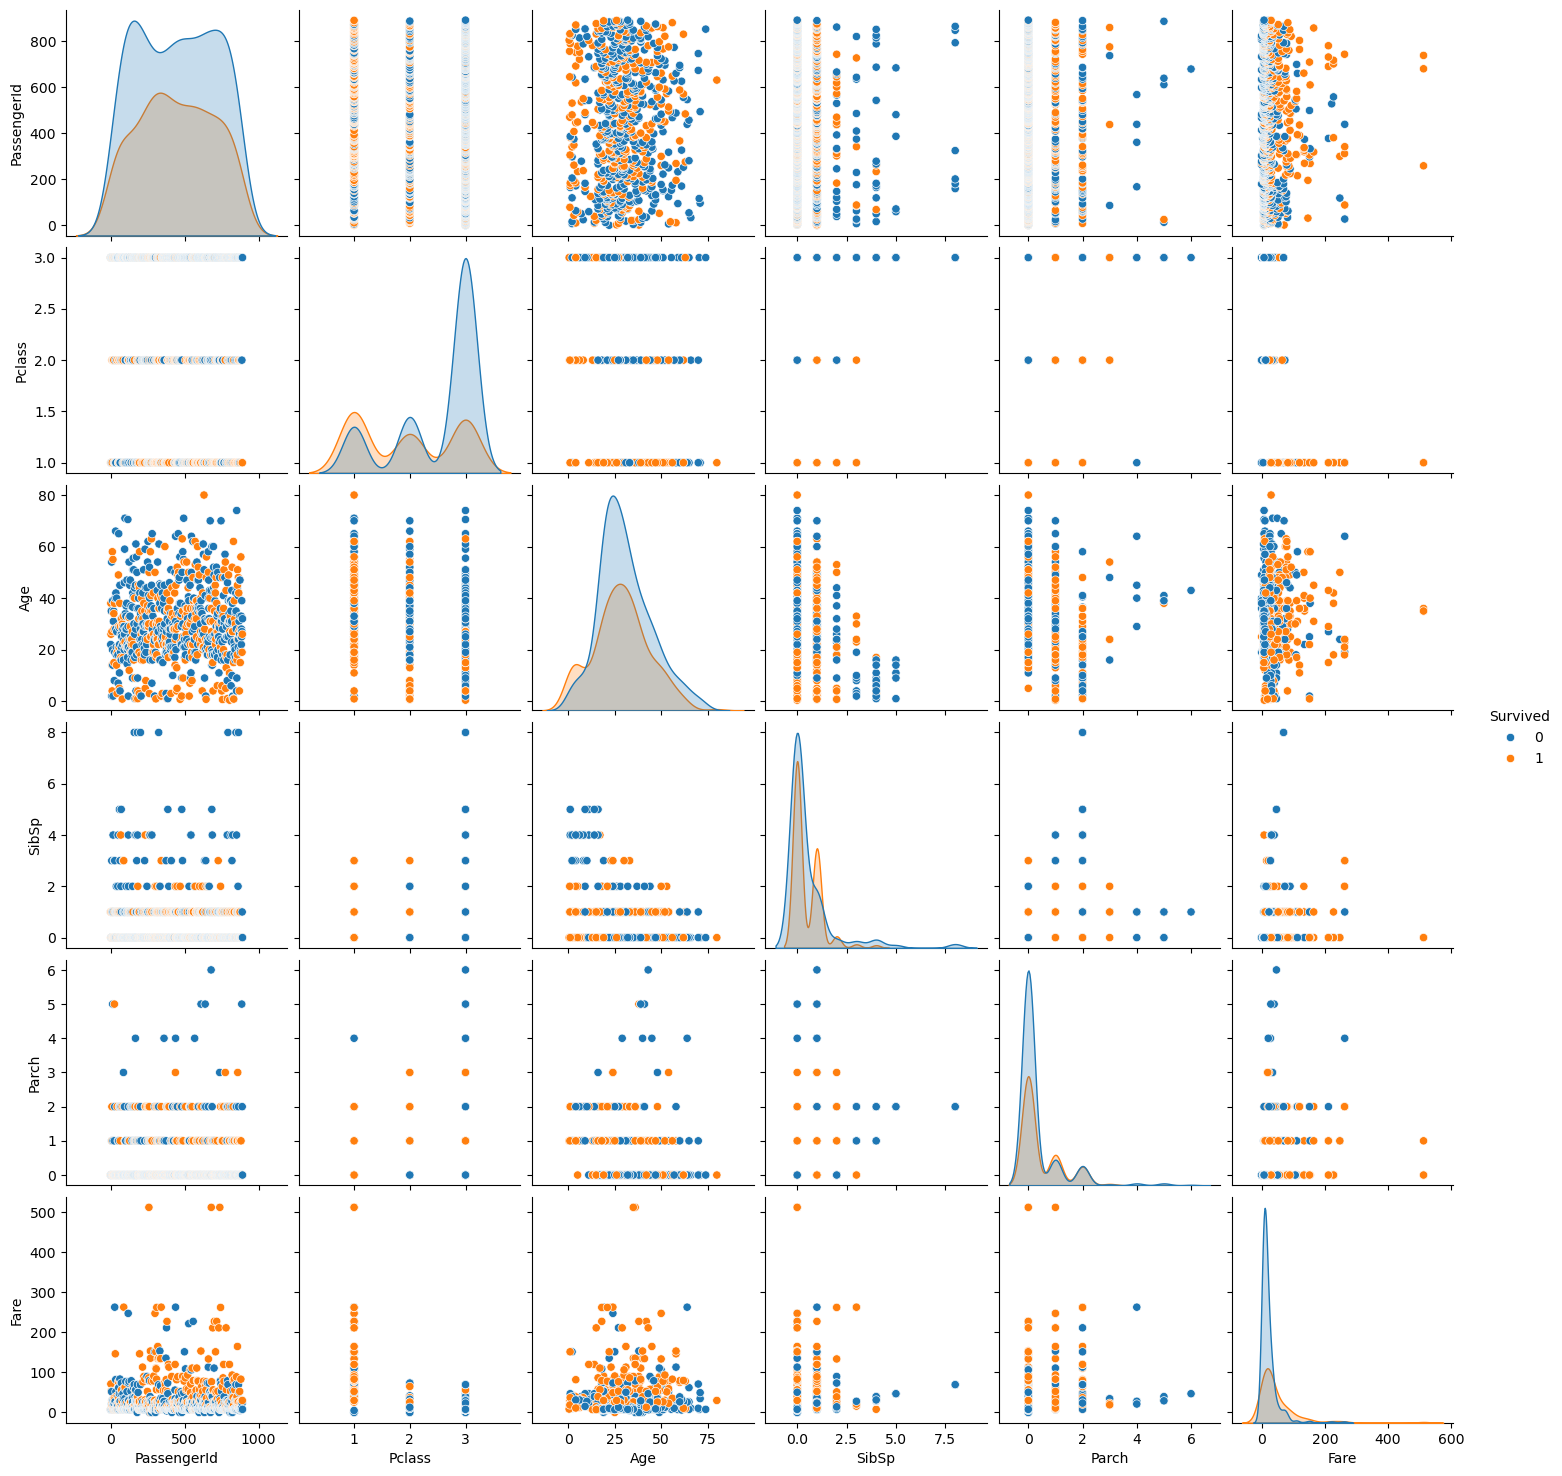

In [23]:
sns.pairplot(data, hue="Survived")

#### Unique values count for each column

In [26]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

#### Just a beautiful visualization of cells with missing data

Text(0.5, 1.0, 'Missing values')

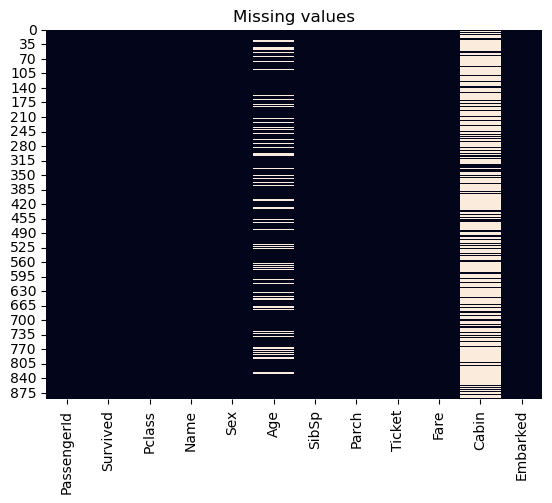

In [29]:
data.isnull().sum()
sns.heatmap(data.isnull(), cbar = False).set_title("Missing values")

In [31]:
#The most people without age are from the thihrd class. So, maybe the mean age is better calculated by classes.

raws_without_age = data[data['Age'].isnull()]
print(raws_without_age.head(30))

     PassengerId  Survived  Pclass  \
5              6         0       3   
17            18         1       2   
19            20         1       3   
26            27         0       3   
28            29         1       3   
29            30         0       3   
31            32         1       1   
32            33         1       3   
36            37         1       3   
42            43         0       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
55            56         1       1   
64            65         0       1   
65            66         1       3   
76            77         0       3   
77            78         0       3   
82            83         1       3   
87            88         0       3   
95            96         0       3   
101          102         0       3   
107          108         1       3   
109          110         1       3   
121         

#### Building different distributions

In [34]:
#Women survived more often than men.

women = data.loc[data.Sex == 'female']["Survived"]
men = data.loc[data.Sex == 'male']["Survived"]

print("% of women who survived:", sum(women)/len(women))
print("% of men who survived:", sum(men)/len(men))

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


In [36]:
#The second class was the worst, not the third.

first = data.loc[data.Pclass == 1]["Survived"]
second = data.loc[data.Pclass == 2]["Survived"]
third = data.loc[data.Pclass == 3]["Survived"]

print("% of first class travelers who survived:", sum(first)/len(first))
print("% of second class travelers who survived:", sum(second)/len(second))
print("% of third class travelers who survived:", sum(third)/len(first))

% of first class travelers who survived: 0.6296296296296297
% of second class travelers who survived: 0.47282608695652173
% of third class travelers who survived: 0.5509259259259259


In [40]:
grouped = data.groupby('Survived')[['Age', 'Fare']].agg(['mean', 'median'])
grouped.columns = ['_'.join(col) for col in grouped.columns]  # Составление новых имен столбцов
print(grouped)


           Age_mean  Age_median  Fare_mean  Fare_median
Survived                                               
0         30.626179        28.0  22.117887         10.5
1         28.343690        28.0  48.395408         26.0


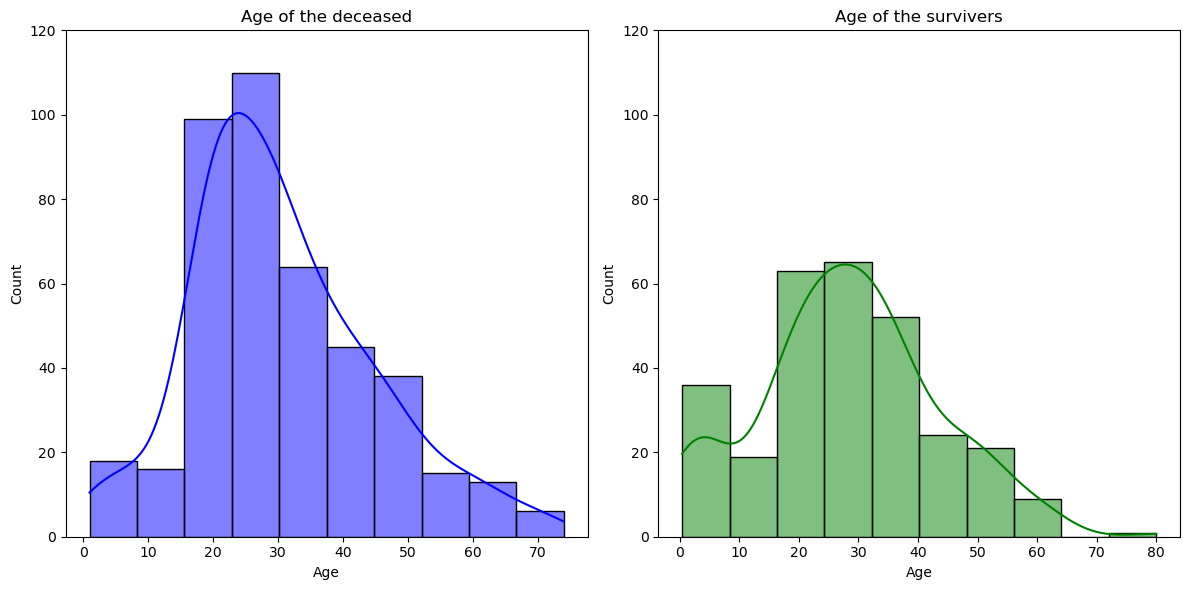

In [42]:
#Most kids were saved, all the old people died.

age_0 = data[data['Survived'] == 0]
age_1 = data[data['Survived'] == 1]

# Building the figure
plt.figure(figsize=(12, 6))

# First graph
plt.subplot(1, 2, 1)  # 1 raw, 2 columns, 1 graph
sns.histplot(age_0['Age'], kde=True, bins=10, color='blue')
plt.title('Age of the deceased')
plt.xlabel('Age')
plt.ylabel('Count')
plt.ylim(0, 120)

# Second graph
plt.subplot(1, 2, 2)  # 1 raw, 2 columns, 2 graph
sns.histplot(age_1['Age'], kde=True, bins=10, color='green')
plt.title('Age of the survivers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.ylim(0, 120)


# Both of them
plt.tight_layout()
plt.show()


In [44]:
q25 = data['Age'].quantile(0.25)  # 25 percenti
q75 = data['Age'].quantile(0.75)  # 75-й перцентиль

reach = data.loc[data.Fare > q75]["Survived"]
normal = data.loc[(data.Fare >= q25) & data.Fare <= q75]["Survived"]
poor = data.loc[data.Fare < q25]["Survived"]

print("% of reach people who survived:", sum(reach)/len(reach))
print("% of normal people who survived:", sum(normal)/len(normal))
print("% of poor people who survived:", sum(poor)/len(poor))

% of reach people who survived: 0.6210526315789474
% of normal people who survived: 0.3838383838383838
% of poor people who survived: 0.27766990291262134


<Axes: xlabel='Age', ylabel='Fare'>

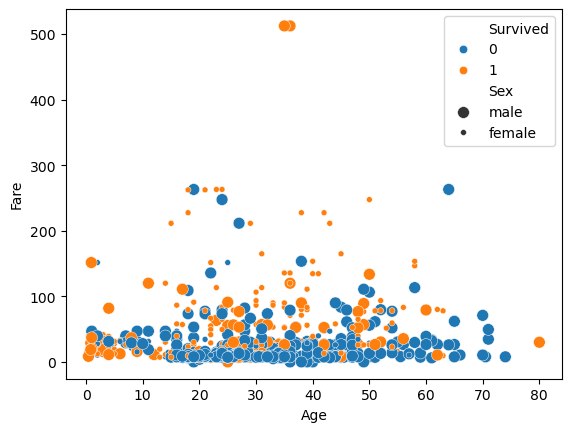

In [46]:
# In general, poor, old, male died and kids, reach and female survived.

sns.scatterplot(data=data, x='Age', y='Fare', hue='Survived', size='Sex')

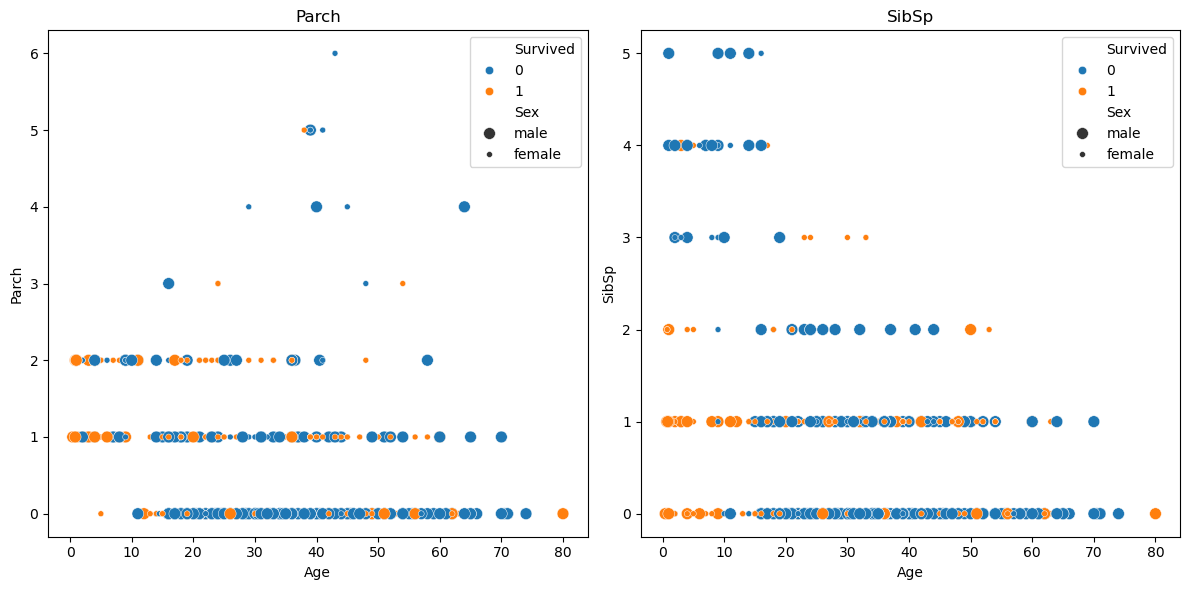

In [48]:
# Building the figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 строка, 2 столбца

# First graph
sns.scatterplot(data=data, x='Age', y='Parch', hue='Survived', size='Sex', ax=axes[0])
axes[0].set_title('Parch')

# Second graph
sns.scatterplot(data=data, x='Age', y='SibSp', hue='Survived', size='Sex', ax=axes[1])
axes[1].set_title('SibSp')

# Both of them
plt.tight_layout()
plt.show()

#Big families died. Maybe one kid or spouse is the best solution.

## Data preprocessing

In [11]:
#Check the duplicates before droping anything.

data.duplicated().sum()

0

In [43]:
#We drop 'PassengerId' , 'Ticket', 'Name' and 'Embarked' because of they don't seem important for survival,
# and, unfortunately 'Cabin', because of the lck of the data.

final_data = data.drop(columns = ['PassengerId', 'Ticket', 'Name', 'Embarked', 'Cabin'],axis=1)

In [45]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [47]:
# Now we replace NaN in the column Age with avarege numbers for the same class, sex and family. 

final_data['Age'] = final_data['Age'].fillna(
    final_data.groupby(['Pclass', 'Sex', 'Parch'])['Age'].transform('mean')
)

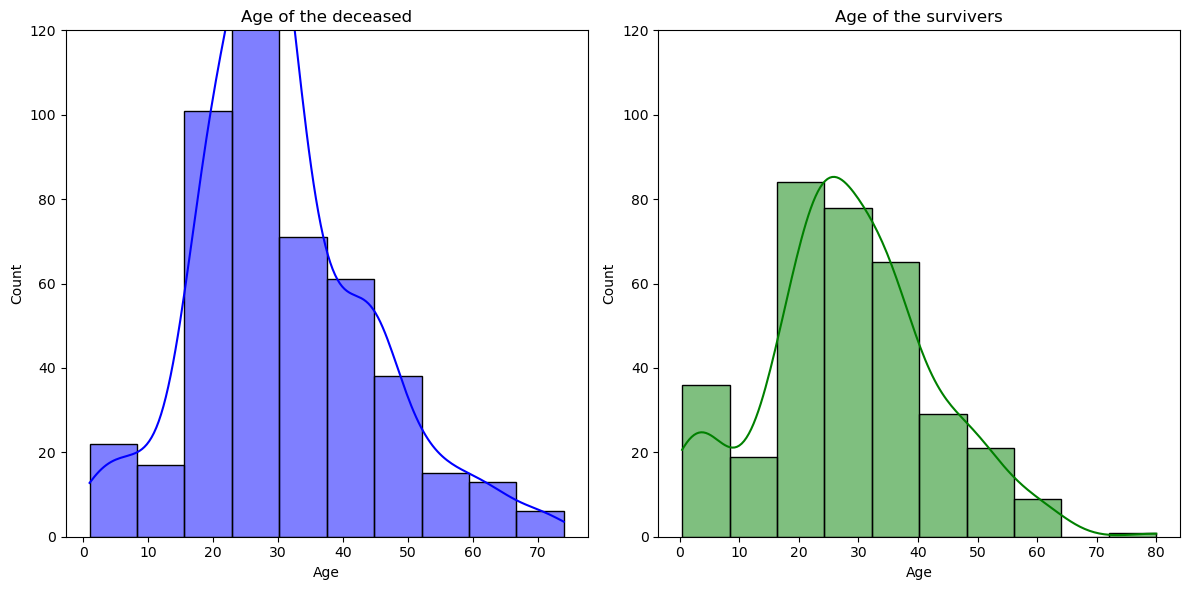

In [52]:
# The age distribution is not really good, maybe we'll need something else.

age_0 = final_data[final_data['Survived'] == 0]
age_1 = final_data[final_data['Survived'] == 1]

# Building the figure
plt.figure(figsize=(12, 6))

# First graph
plt.subplot(1, 2, 1)  # 1 raw, 2 columns, 1 graph
sns.histplot(age_0['Age'], kde=True, bins=10, color='blue')
plt.title('Age of the deceased')
plt.xlabel('Age')
plt.ylabel('Count')
plt.ylim(0, 120)

# Second graph
plt.subplot(1, 2, 2)  # 1 raw, 2 columns, 2 graph
sns.histplot(age_1['Age'], kde=True, bins=10, color='green')
plt.title('Age of the survivers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.ylim(0, 120)


# Both of them
plt.tight_layout()
plt.show()

In [49]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [51]:
# Replacing the column 'Sex' with two numerical features.  

final_data = pd.get_dummies(final_data, columns=['Sex'], prefix='', prefix_sep='')

final_data['male'] = (final_data['male']).astype(int)
final_data['female'] = (final_data['female']).astype(int)

final_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [53]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   female    891 non-null    int64  
 7   male      891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


## Scaling the data

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [214]:
scaled_data=MinMaxScaler().fit_transform(final_data)

In [216]:
scaled_data=pd.DataFrame(scaled_data)
scaled_data

,0,1,2,3,4,5,6,7
0,0.0,1.0,0.271174,0.125,0.000000,0.014151,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.000000,0.139136,1.0,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,1.0,0.0
3,1.0,0.0,0.434531,0.125,0.000000,0.103644,1.0,0.0
4,0.0,1.0,0.434531,0.000,0.000000,0.015713,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.334004,0.000,0.000000,0.025374,0.0,1.0
887,1.0,0.0,0.233476,0.000,0.000000,0.058556,1.0,0.0
888,0.0,1.0,0.164363,0.125,0.333333,0.045771,1.0,0.0
889,1.0,0.0,0.321438,0.000,0.000000,0.058556,0.0,1.0


In [218]:
scaled_data.columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Female', 'Male']
scaled_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Female,Male
0,0.0,1.0,0.271174,0.125,0.000000,0.014151,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.000000,0.139136,1.0,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,1.0,0.0
3,1.0,0.0,0.434531,0.125,0.000000,0.103644,1.0,0.0
4,0.0,1.0,0.434531,0.000,0.000000,0.015713,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.334004,0.000,0.000000,0.025374,0.0,1.0
887,1.0,0.0,0.233476,0.000,0.000000,0.058556,1.0,0.0
888,0.0,1.0,0.164363,0.125,0.333333,0.045771,1.0,0.0
889,1.0,0.0,0.321438,0.000,0.000000,0.058556,0.0,1.0


In [71]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    float64
 4   Parch     891 non-null    float64
 5   Fare      891 non-null    float64
 6   Female    891 non-null    float64
 7   Male      891 non-null    float64
dtypes: float64(8)
memory usage: 55.8 KB


## Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

In [73]:
#features and goal groups
features = scaled_data.drop(columns="Survived")
goal = scaled_data["Survived"]

In [75]:
#train and test groups
features_train, features_test, goal_train, goal_test = train_test_split(features, goal, test_size=0.1, random_state=0)


In [77]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, 815 to 684
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  801 non-null    float64
 1   Age     801 non-null    float64
 2   SibSp   801 non-null    float64
 3   Parch   801 non-null    float64
 4   Fare    801 non-null    float64
 5   Female  801 non-null    float64
 6   Male    801 non-null    float64
dtypes: float64(7)
memory usage: 50.1 KB


In [102]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, 815 to 684
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  801 non-null    float64
 1   Age     793 non-null    float64
 2   SibSp   801 non-null    float64
 3   Parch   801 non-null    float64
 4   Fare    801 non-null    float64
 5   Female  801 non-null    float64
 6   Male    801 non-null    float64
dtypes: float64(7)
memory usage: 50.1 KB


## Comparing Models

In [153]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

## Grid Search on Logistic Regression

In [85]:
#grid search parameters
LR_params = {
    'penalty': ['l1', 'l2'],  # Include only valid penalties for respective solvers
    'solver': ['saga', 'liblinear'],  # These solvers support 'l1'
    'tol': [1, 0.1, 0.01],
    'C': [1, 10, 100, 1000]
}

#applying grid search to find the best parameters
LR = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
GRS = GridSearchCV(LR, LR_params, cv=5, error_score='raise')  # Debugging with 'raise'
GRS.fit(features_train, goal_train)

print(GRS.best_params_)
print(GRS.best_score_)

{'C': 10, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.1}
0.8077329192546584


In [95]:
#using model with the best parameters
LR = LogisticRegression(dual=False, penalty="l2", solver="saga", tol=0.1, C=10)
LR.fit(features_train,goal_train)

LR_Pred = LR.predict(features_test)
LR_Pred_Train = LR.predict(features_train)

In [97]:
print("Classification Report for the test group: \n")
print(classification_report(goal_test, LR_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(goal_train, LR_Pred_Train),"\n\n")

Classification Report for the test group: 

              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84        51
         1.0       0.82      0.72      0.77        39

    accuracy                           0.81        90
   macro avg       0.81      0.80      0.80        90
weighted avg       0.81      0.81      0.81        90
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       498
         1.0       0.78      0.70      0.74       303

    accuracy                           0.81       801
   macro avg       0.80      0.79      0.80       801
weighted avg       0.81      0.81      0.81       801
 




In [158]:
f1 = f1_score(goal_test, LR_Pred)
print(f'F1-score: {f1:.2f}')

accuracy = accuracy_score(goal_test, LR_Pred)
print(f'Accuracy: {accuracy:.2f}')

F1-score: 0.77
Accuracy: 0.81


## Grid Search on K Nearest Numbers

In [123]:
#grid search parameters
KNN_params={
    "n_neighbors":[3,4,5,6,7,8,9,10],
    "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    "weights":["uniform","distance"],
    "leaf_size":[10,20,30,40,50]
}

#applying grid search to find the best parameters
KNN = KNeighborsClassifier()
GRS = GridSearchCV(KNN, KNN_params, cv = 5)
GRS.fit(features_train, goal_train)

print(GRS.best_params_)
print(GRS.best_score_)

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 4, 'weights': 'uniform'}
0.8115139751552796


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [127]:
#using model with the best parameters

KNN = KNeighborsClassifier(algorithm = "auto", leaf_size = 30, n_neighbors = 4, weights = "uniform")
KNN.fit(features_train, goal_train)

KNN_Pred = KNN.predict(features_test)
KNN_Pred_Train = KNN.predict(features_train)

In [131]:
print("Classification Report for the test group: \n")
print(classification_report(goal_test, KNN_Pred),"\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(goal_train, KNN_Pred_Train),"\n")

Classification Report for the test group: 

              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        51
         1.0       0.84      0.69      0.76        39

    accuracy                           0.81        90
   macro avg       0.82      0.80      0.80        90
weighted avg       0.82      0.81      0.81        90
 

Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90       498
         1.0       0.91      0.73      0.81       303

    accuracy                           0.87       801
   macro avg       0.88      0.84      0.86       801
weighted avg       0.87      0.87      0.87       801
 



In [156]:
f1 = f1_score(goal_test, KNN_Pred)
print(f'F1-score: {f1:.2f}')

accuracy = accuracy_score(goal_test, KNN_Pred)
print(f'Accuracy: {accuracy:.2f}')

F1-score: 0.76
Accuracy: 0.81


## Grid Search on Random Forest Model

In [135]:
#grid search parameters


RFC_params = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'criterion': ["gini", "entropy", "log_loss"],
    'max_depth': [5, 10, 20, None],  # Depth of the tree
    'max_features': ['sqrt', 'log2', None],  # Ensure valid values for max_features
    'class_weight': ["balanced", "balanced_subsample"]
}

#applying grid search to find the best parameters
RFC = RandomForestClassifier()
GRS = GridSearchCV(RFC, RFC_params, cv = 5)
GRS.fit(features_train, goal_train)

print(GRS.best_params_)
print(GRS.best_score_)

{'class_weight': 'balanced_subsample', 'criterion': 'log_loss', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}
0.8351785714285714


In [137]:
#using model with the best parameters
RFC = RandomForestClassifier(bootstrap= True,class_weight='balanced_subsample', criterion="log_loss", max_depth = 10, max_features="log2", n_estimators = 100)

RFC.fit(features_train, goal_train)

RFC_Pred=RFC.predict(features_test)
RFC_Pred_Train=RFC.predict(features_train)

In [147]:
print("Classification Report for the test group: \n")
print(classification_report(goal_test, RFC_Pred),"\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(goal_train, RFC_Pred_Train),"\n")

Classification Report for the test group: 

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87        51
         1.0       0.86      0.77      0.81        39

    accuracy                           0.84        90
   macro avg       0.85      0.84      0.84        90
weighted avg       0.85      0.84      0.84        90
 

Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       498
         1.0       0.94      0.88      0.91       303

    accuracy                           0.93       801
   macro avg       0.94      0.92      0.93       801
weighted avg       0.93      0.93      0.93       801
 



In [160]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

f1 = f1_score(goal_test, RFC_Pred)
print(f'F1-score: {f1:.2f}')

accuracy = accuracy_score(goal_test, RFC_Pred)
print(f'Accuracy: {accuracy:.2f}')

F1-score: 0.81
Accuracy: 0.84


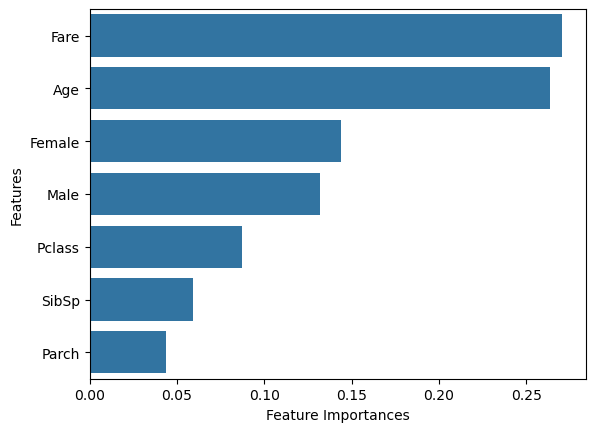

In [164]:
feature_scores = pd.Series(RFC.feature_importances_,
                          index = features_train.columns).sort_values(ascending = False)

sns.barplot(x = feature_scores, y = feature_scores.index)
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.show()

## Random Forest with less data

In [200]:
data.loc[data['Age'].isna(), ['Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Fare']].head(60)


,Survived,Pclass,Name,Sex,SibSp,Parch,Fare
5,0,3,"Moran, Mr. James",male,0,0,8.4583
17,1,2,"Williams, Mr. Charles Eugene",male,0,0,13.0000
19,1,3,"Masselmani, Mrs. Fatima",female,0,0,7.2250
26,0,3,"Emir, Mr. Farred Chehab",male,0,0,7.2250
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,0,0,7.8792
29,0,3,"Todoroff, Mr. Lalio",male,0,0,7.8958
31,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,1,0,146.5208
32,1,3,"Glynn, Miss. Mary Agatha",female,0,0,7.7500
36,1,3,"Mamee, Mr. Hanna",male,0,0,7.2292
42,0,3,"Kraeff, Mr. Theodor",male,0,0,7.8958


In [233]:
#age with mean by survived
#family feauture

final_data = data.drop(columns = ['PassengerId', 'Ticket', 'Name', 'Embarked', 'Cabin'],axis=1)

In [237]:
final_data['Age'] = final_data['Age'].fillna(
    final_data.groupby(['Survived'])['Age'].transform('mean')
)
final_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.000000,1,0,7.2500
1,1,1,female,38.000000,1,0,71.2833
2,1,3,female,26.000000,0,0,7.9250
3,1,1,female,35.000000,1,0,53.1000
4,0,3,male,35.000000,0,0,8.0500
5,0,3,male,30.626179,0,0,8.4583
6,0,1,male,54.000000,0,0,51.8625
7,0,3,male,2.000000,3,1,21.0750
8,1,3,female,27.000000,0,2,11.1333
9,1,2,female,14.000000,1,0,30.0708


In [239]:
# Replacing the column 'Sex' with two numerical features.  

final_data = pd.get_dummies(final_data, columns=['Sex'], prefix='', prefix_sep='')

final_data['male'] = (final_data['male']).astype(int)
final_data['female'] = (final_data['female']).astype(int)

final_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [247]:
final_data['Family'] = final_data['SibSp'] + final_data['Parch']
final_data = final_data.drop(columns = ['SibSp', 'Parch'],axis=1)
final_data.head(5)

,Survived,Pclass,Age,Fare,female,male,Family
0,0,3,22.0,7.2500,0,1,1
1,1,1,38.0,71.2833,1,0,1
2,1,3,26.0,7.9250,1,0,0
3,1,1,35.0,53.1000,1,0,1
4,0,3,35.0,8.0500,0,1,0


In [251]:
#data scaling

scaled_data=MinMaxScaler().fit_transform(final_data)
scaled_data=pd.DataFrame(scaled_data)
scaled_data.columns = ['Survived', 'Pclass', 'Age', 'Fare', 'Female', 'Male', 'Family']
scaled_data


,Survived,Pclass,Age,Fare,Female,Male,Family
0,0.0,1.0,0.271174,0.014151,0.0,1.0,0.1
1,1.0,0.0,0.472229,0.139136,1.0,0.0,0.1
2,1.0,1.0,0.321438,0.015469,1.0,0.0,0.0
3,1.0,0.0,0.434531,0.103644,1.0,0.0,0.1
4,0.0,1.0,0.434531,0.015713,0.0,1.0,0.0
...,...,...,...,...,...,...,...
886,0.0,0.5,0.334004,0.025374,0.0,1.0,0.0
887,1.0,0.0,0.233476,0.058556,1.0,0.0,0.0
888,0.0,1.0,0.379570,0.045771,1.0,0.0,0.3
889,1.0,0.0,0.321438,0.058556,0.0,1.0,0.0


In [255]:
#data spliting 
#features and goal groups
features = scaled_data.drop(columns="Survived")
goal = scaled_data["Survived"]

#train and test groups
features_train, features_test, goal_train, goal_test = train_test_split(features, goal, test_size=0.1, random_state=0)

In [257]:
RFC_params = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'class_weight': ["balanced", "balanced_subsample"]
}

#applying grid search to find the best parameters
RFC = RandomForestClassifier()
GRS = GridSearchCV(RFC, RFC_params, cv = 5)
GRS.fit(features_train, goal_train)

print(GRS.best_params_)
print(GRS.best_score_)

{'class_weight': 'balanced_subsample', 'n_estimators': 200}
0.826475155279503


In [295]:
#using model with the best parameters
RFC = RandomForestClassifier(bootstrap=True, class_weight="balanced_subsample", criterion = 'log_loss', n_estimators = 200)

RFC.fit(features_train, goal_train)

RFC_Pred=RFC.predict(features_test)
RFC_Pred_Train=RFC.predict(features_train)

In [297]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

f1 = f1_score(goal_test, RFC_Pred)
print(f'F1-score: {f1:.2f}')

accuracy = accuracy_score(goal_test, RFC_Pred)
print(f'Accuracy: {accuracy:.2f}')

F1-score: 0.86
Accuracy: 0.89


In [271]:
#{'class_weight': 'balanced', 'criterion': 'log_loss', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 50}
# 0.8377251552795032

## The best result is accuracy 0,89 with Random Forest